# Scikit-Learn Tutorial: Mushroom Classification

## Introduction

In this tutorial, we will explore various machine learning techniques using the scikit-learn library to classify mushrooms as edible or poisonous based on their physical characteristics. We will cover the following steps:

1. **Data Preprocessing**: Loading the dataset, handling columns, and encoding categorical features.
2. **Model Training**: Training different classifiers including Naive Bayes, Logistic Regression, and Random Forest.
3. **Model Evaluation**: Evaluating the performance of the models using accuracy scores.
4. **Hyperparameter Tuning**: Using GridSearchCV to find the best hyperparameters for the RandomForestClassifier.
5. **Feature Importance**: Analyzing the importance of different features in the dataset.

By the end of this tutorial, you will have a basic understanding of how to explore and preprocess data, train and evaluate models, and perform hyperparameter tuning using scikit-learn.

In [1]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

# 2 samples, 3 features
X = [[ 1,  2,  3],
     [11, 12, 13]]

# labels
y = [0, 1]

# train model
clf.fit(X, y)

# unseen data
Z = [[ 4,  5,  6], 
     [14, 15, 16]]

# make a prediction
clf.predict(Z)

array([0, 1])

In [2]:
from sklearn.preprocessing import Binarizer
X = [[0.5, 5.0, 0.2],
     [0.1, 1.0, 0.3],
     [0.7, 0.2, 0.4],
     [0.4, 3.0, 0.3]]

# binarize the matrix
Binarizer(threshold=0.3).fit_transform(X)

array([[1., 1., 0.],
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [3]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# generate dummy regression data
X, y = make_regression(n_samples=1000, random_state=0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# transform training set
X_train_scaled = StandardScaler().fit_transform(X_train)

# create and train a model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# transform testing set
X_test_scaled = StandardScaler().fit_transform(X_test)
pred = lr.predict(X_test_scaled)

# evaluate the model
mean_squared_error(pred, y_test)

250.14895456563454

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

# Mushroom Dataset

In [6]:
import pandas as pd

In [7]:
shrooms_df = pd.read_csv('data/mushrooms.csv')

In [8]:
shrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
shrooms_df.shape

(7823, 23)

In [10]:
shrooms_df['class'].value_counts()

class
e    4107
p    3716
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score, accuracy_score

In [12]:
# Apply LabelEncoder to each column to convert categorical data to numerical data
shrooms_df = shrooms_df.apply(LabelEncoder().fit_transform)

In [13]:
shrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
# Checking the sum of each column to see if there are any empty columns
shrooms_df.sum()

class                        3716
cap-shape                   26194
cap-surface                 14247
cap-color                   34941
bruises                      3264
odor                        32705
gill-attachment              7619
gill-spacing                 1291
gill-size                    2433
gill-color                  37673
stalk-shape                  4524
stalk-root                   8674
stalk-surface-above-ring    12370
stalk-surface-below-ring    12579
stalk-color-above-ring      45657
stalk-color-below-ring      45472
veil-type                       0
veil-color                  15375
ring-number                  8367
ring-type                   17926
spore-print-color           28341
population                  28476
habitat                     11630
dtype: int64

column 'veil-type' is all 0s, let's remove it

In [15]:
# Remove the 'veil-type' column as it contains all 0s and does not provide any useful information
shrooms_df.drop(['veil-type'], axis=1, inplace=True)

## Split the dataset

In [16]:
# Split the dataset into features (X) and target (y), then into training and testing sets
X = shrooms_df.drop(['class'], axis=1)
y = shrooms_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [17]:
X_train.shape

(6258, 21)

In [18]:
X_test.shape

(1565, 21)

In [19]:
cnb_clf = CategoricalNB().fit(X_train, y_train)

In [20]:
lr_clf = LogisticRegression(max_iter=600).fit(X_train, y_train)

In [21]:
accuracy_score(cnb_clf.predict(X_test), y_test)

0.9584664536741214

In [22]:
accuracy_score(lr_clf.predict(X_test), y_test)

0.9527156549520767

## Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning is a crucial step in the machine learning pipeline as it helps to improve the performance of the model by finding the optimal set of hyperparameters. In the following cell, we use `GridSearchCV` from the `sklearn` library to perform an exhaustive search over a specified parameter grid for a `RandomForestClassifier`.

`GridSearchCV` automates the process of hyperparameter tuning by performing cross-validation for each combination of parameters in the grid. This ensures that the model is evaluated on different subsets of the data, providing a more robust estimate of its performance. The best combination of hyperparameters is then selected based on the cross-validation results.

This process is important because it helps to avoid overfitting and underfitting, leading to a model that generalizes better to unseen data. By leveraging `sklearn`'s `GridSearchCV`, we can efficiently search for the best hyperparameters and improve the overall performance of our machine learning model.

The cell below demonstrates how to define a parameter grid, create a `GridSearchCV` object, fit it to the training data, and print the best parameters and cross-validation score.
```

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2
)
"""
Parameters:
- estimator: The machine learning algorithm to be optimized.
- param_grid: Dictionary with parameters names as keys and lists of parameter settings to try as values.
- cv: Number of folds in cross-validation.
- n_jobs: Number of jobs to run in parallel. -1 means using all processors.
- verbose: Controls the verbosity: the higher, the more messages.
"""

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  1.0


In [24]:
# test with the best model
best_model = grid_search.best_estimator_
accuracy_score(best_model.predict(X_test), y_test)

1.0

The test accuracy is a perfect 1 because the model has learned to perfectly distinguish between the classes in the test set. 

The high classification accuracy is because certain features in the dataset are highly indicative of the target variable. Notably, the 'odor' feature plays a significant role in distinguishing between edible and poisonous mushrooms. For instance, mushrooms emitting a foul odor are almost always poisonous, while those with no odor are typically edible. This strong correlation enables machine learning models to achieve near-perfect or perfect accuracy. 

Additionally, features such as 'spore-print color' and 'gill size' further enhance the model's ability to differentiate between classes. The presence of these informative features reduces ambiguity, allowing models to make accurate predictions consistently. 

It's important to note that while achieving perfect accuracy on this dataset is feasible, it doesn't necessarily reflect a model's performance on real-world mushroom classification tasks. The dataset is based on a specific set of mushroom species and may not encompass the full diversity found in nature. Therefore, caution should be exercised when generalizing these results beyond the dataset.


In the following cell, we will use the `feature_importances_` attribute of the `RandomForestClassifier` to determine the importance of each feature in the dataset. The `feature_importances_` attribute provides a score for each feature, indicating how important it is for the prediction of the target variable. 

We will follow these steps:
1. Retrieve the feature importances from the best model obtained through `GridSearchCV`.
2. Sort the features by their importance scores in descending order.
3. Print the ranking of the features along with their importance scores.
4. Visualize the feature importances using a bar plot.

This process helps us understand which features contribute the most to the model's predictions, allowing us to gain insights into the underlying patterns in the data.

Feature ranking:
1. feature 7 (0.19255231735204692) - gill-size
2. feature 4 (0.14153017182768196) - odor
3. feature 18 (0.1319118991448267) - spore-print-color
4. feature 8 (0.09016353843810275) - gill-color
5. feature 10 (0.057286019103539344) - stalk-root
6. feature 17 (0.05634435787377098) - ring-type
7. feature 19 (0.054370660507239335) - population
8. feature 12 (0.051158711413234796) - stalk-surface-below-ring
9. feature 3 (0.046327499915969364) - bruises
10. feature 20 (0.025603298600993404) - habitat
11. feature 6 (0.025515933765163177) - gill-spacing
12. feature 14 (0.025289773119935667) - stalk-color-below-ring
13. feature 9 (0.024384162926736157) - stalk-shape
14. feature 13 (0.018744250416319365) - stalk-color-above-ring
15. feature 11 (0.017021937005869448) - stalk-surface-above-ring
16. feature 2 (0.015511112330477519) - cap-color
17. feature 1 (0.009612435359823207) - cap-surface
18. feature 16 (0.00843598301046787) - ring-number
19. feature 0 (0.004769387975853735) - c

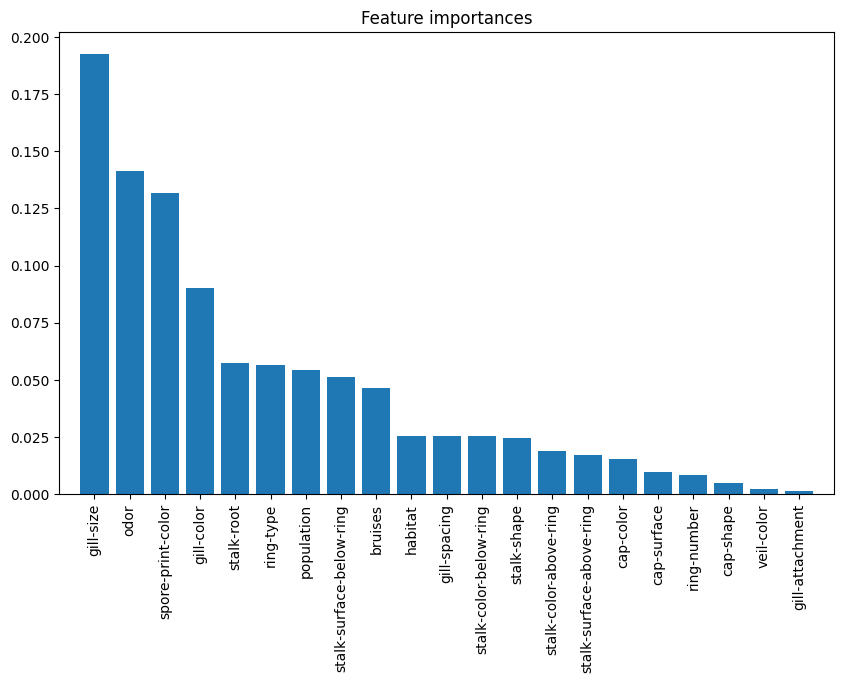

In [25]:
import numpy as np

import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_model.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {feature_names[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()